# Evidencia Módulo 2: Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución.
*Portafolio de Implementación*
Estudiante: Camila Cusicanqui A00571258
Clase: Inteligencia artificial avanzada para la ciencia de datos I - Gpo 101
Fecha: 18 de septiembre de 2022

La evidencia del módulo 2 nos pide utilizar un framework o biblioteca de aprendizaje máquina para la implementación de una solución.

Para realizar lo mencionado, hicimos lo siguiente:
* Crear un repositorio de GitHub para este proyecto.
* Programar uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice) haciendo uso de una biblioteca o framework de aprendizaje máquina.
* Prueba tu implementación con un set de datos y realiza algunas predicciones. Las predicciones las puedes correr en consola o las puedes implementar con una interfaz gráfica apoyándote en los visto en otros módulos.
* Tu implementación debe de poder correr por separado solamente con un compilador, no debe de depender de un IDE o de un “notebook”. Por ejemplo, si programas en Python, tu implementación final se espera que esté en un archivo .py no en un Jupyter Notebook.

Nuestro objetivo es crear un modelo de aprendizaje de máquina que predice cuáles pasajeros sobreviven el hundimiento del Titanic. El dataset utilizado proviene de Kaggle y se encuentra en: https://www.kaggle.com/c/titanic.

In [303]:
# LIBRERÍAS
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# ML
import graphviz
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# Exploración del set de datos
En está sección revisaremos el tipo de variables que tenemos y sus características y patrones relevantes.

Importamos los datos. 

In [304]:
df = pd.read_csv('train.csv',index_col = "PassengerId")

Visualizamos el dataframe. 

In [305]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Observamos el tamaño de la muestra y la cantidad de NaNs en nuestros datos. 

In [306]:
df.shape

(891, 11)

In [307]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

El variable de las cabañas tiene demasiado NaNs, por lo tanto, lo elimaremos. Igual quitamos el variable de embarked porque también tiene NaNs.Como solamente son dos y nuestro tamaño de muestra es considerable, eliminaremos los renglones 
La variable de la edad tiene 177 NaNs, la mejor opción es quitarlos ya que el factor de la edad si es muy relevante para nuestro modelo. 

In [308]:
df = df.drop('Cabin',axis=1)
df = df.dropna()

In [309]:
#Contamos los NaNs
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [310]:
# Vemos el cambio en nuestro tamaño de muestra
df.shape

(712, 10)

## 1ra etapa de filtración de datos
Visualizamos nuestra tabla del data set con la primera etapa de filtraje. 

In [311]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Las variables de nombre, ticket y fare son irrelevantes para nuestro modelo, por lo tanto, los quitamos.

In [312]:
# Datos irrelevantes
df = df.drop(['Name','Ticket','Fare'],axis = 1)

Para reducir las dimensiones de nuestro dataset podemos sumar la columna de los hermanos y papás ('Sibsp' y 'Parch') y eliminarlas. Si la persona fue sola se agrega 1 a esta columna.
Realizamos esto para observar si un variable importante para la superviviencia es el tamaño de la familia aborde.

In [313]:
df['Total ppl'] = df['Parch'] + df['SibSp'] + 1
df = df.drop(['Parch','SibSp'],axis=1)

## 2da etapa de filtraje de datos
Visualizamos nuestra tabla del dataset con la segunda etapa de filtración de datos. 

In [314]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Total ppl
PassengerId,,,,,,
1,0,3,male,22.0,S,2
2,1,1,female,38.0,C,2
3,1,3,female,26.0,S,1
4,1,1,female,35.0,S,2
5,0,3,male,35.0,S,1


Queremos categorizar las edades ya que nuestro resultado es binario para esto debemos encontrar un rango de los edades. Posterior a esto los ponemos en sus respectivas categorías y quitamos la columna de edad.

In [315]:
for i in df:
    df['Age Category'] = pd.cut(df['Age'],bins=[0,5,12,18,35,60,81], \
                             labels = ['Bebe', 'Niño','Adolescente','Adulto Joven','Adulto Mayor','Anciano'])

df=df.drop('Age',axis=1)

## 3ra etapa de filtraje de datos

In [316]:
df.head(5)

,Survived,Pclass,Sex,Embarked,Total ppl,Age Category
PassengerId,,,,,,
1,0,3,male,S,2,Adulto Joven
2,1,1,female,C,2,Adulto Mayor
3,1,3,female,S,1,Adulto Joven
4,1,1,female,S,2,Adulto Joven
5,0,3,male,S,1,Adulto Joven


## Visualizar datos
Ahora visualizaremos nuestros datos con respecto a nuestro variable objetivo. 

<AxesSubplot:xlabel='Total ppl', ylabel='Survived'>

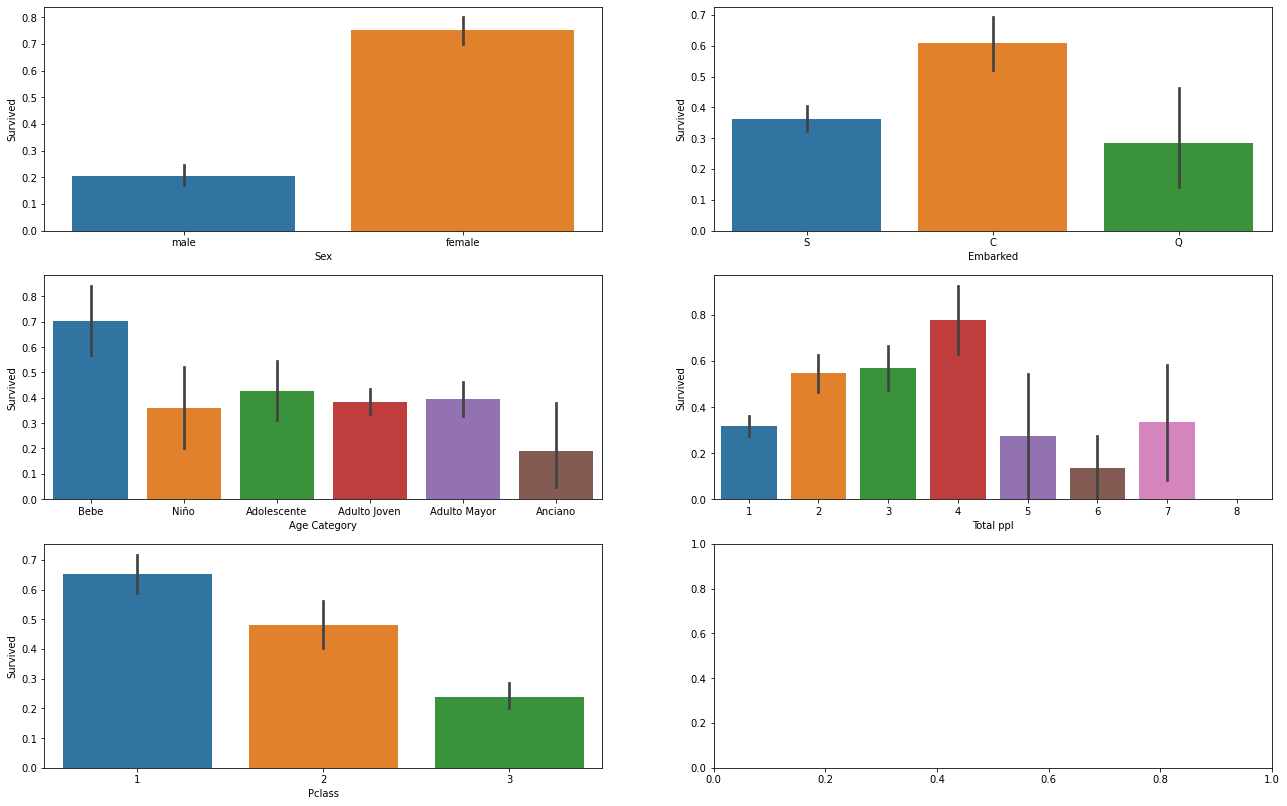

In [317]:
fig, axes = plt.subplots(3, 2, figsize=(22,14))

sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0, 0])
sns.barplot(x='Age Category', y='Survived', data=df, ax=axes[1, 0])
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[2, 0])
sns.barplot(x='Embarked', y='Survived', data=df, ax=axes[0, 1])
sns.barplot(x='Total ppl', y='Survived', data=df, ax=axes[1, 1])

Para asegurarnos que no hay outliers, realizamos lo siguiente: 

<AxesSubplot:xlabel='PassengerId', ylabel='Total ppl'>

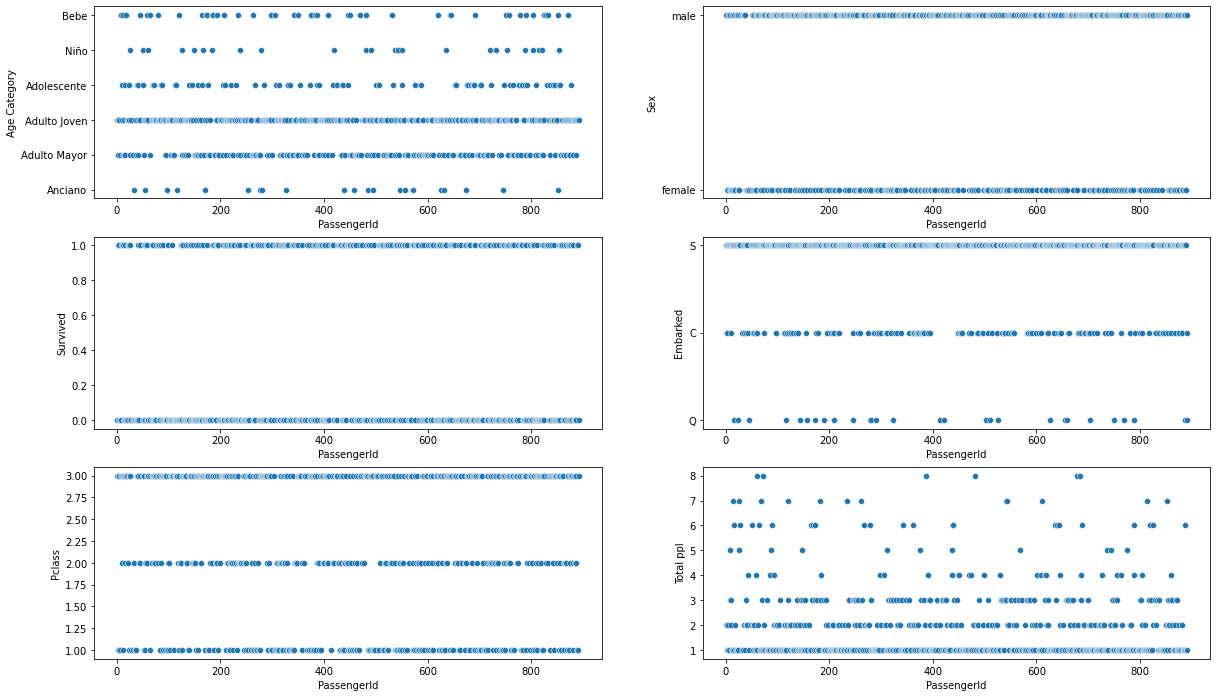

In [318]:
fig, axes = plt.subplots(3, 2, figsize=(20,12))
sns.scatterplot(x='PassengerId', y='Age Category', data=df, ax=axes[0, 0])
sns.scatterplot(x='PassengerId', y='Survived', data=df, ax=axes[1, 0])
sns.scatterplot(x='PassengerId', y='Pclass', data=df, ax=axes[2, 0])
sns.scatterplot(x='PassengerId', y='Sex', data=df, ax=axes[0, 1])
sns.scatterplot(x='PassengerId', y='Embarked', data=df, ax=axes[1, 1])
sns.scatterplot(x='PassengerId', y='Total ppl', data=df, ax=axes[2, 1])

Hemos realizado la clasificación de los datos ahora los convertiremos a dummies para tener un dato numérico.

In [319]:
df = pd.get_dummies(df, columns = ["Sex"], drop_first = False)
df = pd.get_dummies(df, columns = ["Age Category"], drop_first = False)
df = pd.get_dummies(df, columns = ["Pclass"], drop_first = False)
df = pd.get_dummies(df, columns = ["Embarked"], drop_first = False)

In [320]:
# Visualización
df.head()

,Survived,Total ppl,Sex_female,Sex_male,Age Category_Bebe,Age Category_Niño,Age Category_Adolescente,Age Category_Adulto Joven,Age Category_Adulto Mayor,Age Category_Anciano,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,
1,0,2,0,1,0,0,0,1,0,0,0,0,1,0,0,1
2,1,2,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1
4,1,2,1,0,0,0,0,1,0,0,1,0,0,0,0,1
5,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1


# Implementación del modelo de aprendizaje de Random Forest Classifier
Random forest es un método de aprendizaje supervisado el cual puede ser utilizado para clasificar tareas como si un pasajero sobrevive el Titanic de acuerdo a distintas medidas como su edad y sexo. Construiremoms este clasificador utilizando SciKit Learn. 

Para construir el modelo se realiza una separación del conjunto de datos en 2 sets diferentes. El primer set se constituye en los datos de entrenamiento para el modelo. El segundo set tiene como propósito evaluar la efectividad de nuestro modelo con datos que previamente no había visto. Con esto podemos observar el desempeño de nuestro modelo.

In [321]:
df_y = df['Survived']# Variable objetivo
df_x = df.drop('Survived',axis=1)

75% de nuestro set de datos se utilizarán para entrenar y el resto (25%) se utilizará para comprobar la eficiencia del modelo. Es importante recalcar que el `random_state` se utilizó con el objetivo de realizar todo este proyecto replicable.

In [322]:
seed = 1800
testp = 0.25
x, x_test, y, y_test = train_test_split(df_x, df_y, test_size=testp, random_state=seed)

Con nuestro data set dividido podemos implementar el clasificador de random forest, `n_estimators` indica la cantidad de árboles que deseamos en nuestro bosque. 

In [323]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators = 20,random_state = seed)
model.fit(x,y)

RandomForestClassifier(n_estimators=20, random_state=1800)

# Predicciones y análisis
Ya teniendo nuestro clasificador podemos predicir los datos utilizado nuestro set de datos de prueba. 

In [324]:
y_pred = model.predict(x_test)
print(y_pred)

[1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1
 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1]


Obtenemos el puntaje de precisión de nuestro modelo. 

In [325]:
print('Accuracy', accuracy_score(y_test,y_pred))

Accuracy 0.8202247191011236


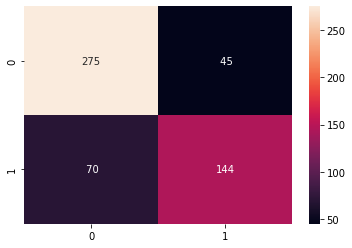

In [326]:
# Realizamos una matriz de confusión
yy = cross_val_predict(model,x,y,cv=10)
sns.heatmap(confusion_matrix(y,yy),annot = True,fmt='3.0f')
plt.show()

In [327]:
f1 = f1_score(y_pred,y_test)

Encontramos el f1 score de nuestro modelo para utilizar otra métrica para encontrar su precisión.

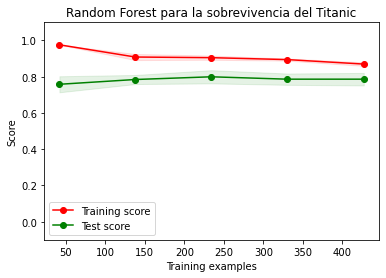

In [328]:
# Queremos observar el learning curve de nuestro modelo 
train_sizes, train_scores, test_scores = learning_curve(model, x, y, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
    
plt.figure()
plt.title("Random Forest para la sobrevivencia del Titanic")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()
    
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")
plt.legend(loc="best")
    
plt.ylim(-.1,1.1)
plt.show()

## Tabla de predicciones
En está sección formaremos nuestra tabla de predicciones.

In [329]:
pred_fin = pd.DataFrame(x_test)

In [330]:
pred_fin = np.append(pred_fin, np.transpose(np.array([y_test])) , axis=1)
pred_fin = np.append(pred_fin, np.transpose(np.array([y_pred])) , axis=1)

In [331]:
pred_fin = pd.DataFrame(pred_fin, columns = col, index = x_test.index.values)

Las primeras 15 columnas son las entradas para nuestro modelo de RFC. La siguiente columna columna es el resultado verídico de nuestras entradas y la última colmuna `Predicción` es la predicción de nuestro modelo con las entradas.

In [333]:
pred_fin.head(10)

,Total ppl,Sex_female,Sex_male,Age Category_Bebe,Age Category_Niño,Age Category_Adolescente,Age Category_Adulto Joven,Age Category_Adulto Mayor,Age Category_Anciano,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Prueba,Predicción
851,7,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1
11,3,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1
423,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
672,2,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1
161,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
420,3,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
757,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
650,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1
87,5,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
176,3,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [334]:
pred_fin.to_csv('predicciones_A00571258.csv')

In [346]:
p = pred_fin.drop(['Total ppl', 'Sex_female','Sex_male','Age Category_Bebe','Age Category_Niño','Age Category_Adolescente','Age Category_Adulto Joven','Age Category_Adulto Mayor','Age Category_Anciano','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S'],axis=1).to_csv('Resultado final_A00571258.csv')